In [1]:
import os, sys
import general_config 
print(general_config.ROOTDIR)
os.chdir(general_config.ROOTDIR)

D:/Desktop@D/xai_basic


In [2]:
import matplotlib
from pipeline.eval.evaluation_xai_utils import EvaluationPackage

In [3]:
FOLDER_NAME = 'nscc.workflow1_0001v0.4.20200802'
model_name = 'workflow1_0001'
BRANCH_NO = 1
xai_mode = 'GuidedGradCam'
XAI_MIDDIR = 'XAI_results'
xai_ext = 'xai' 
csv_ext = 'csv' 

XAI_SAVEDIR = os.path.join('checkpoint', FOLDER_NAME, '%s.%s'%(str(model_name),str(BRANCH_NO)) , XAI_MIDDIR,
    '%s.%s_%s.%s'%(str(model_name), str(BRANCH_NO), str(xai_mode), str(xai_ext)))        
CSV_SAVEDIR = os.path.join('checkpoint', FOLDER_NAME, '%s.%s'%(str(model_name),str(BRANCH_NO)) , XAI_MIDDIR,
    '%s.%s_%s.%s'%(str(model_name), str(BRANCH_NO), str(xai_mode), str(csv_ext)))
GALLERY_DIR = os.path.join('checkpoint', FOLDER_NAME, '%s.%s'%(str(model_name),str(BRANCH_NO)) , XAI_MIDDIR, 
    'gallery_%s.%s_%s.%s'%(str(model_name), str(BRANCH_NO), str(xai_mode), str(xai_ext)))


In [4]:
evalpack = EvaluationPackage()
evalpack = evalpack.load_pickled_data(XAI_SAVEDIR, tv=(0,0,None))
for gallery_label, _ in evalpack.GALLERY.items():
    print(gallery_label)

Loading data via FastPickleClient...
  checkpoint\nscc.workflow1_0001v0.4.20200802\workflow1_0001.1\XAI_results\workflow1_0001.1_GuidedGradCam.xai
8_True
0_True
4_True
6_True
3_True
2_True
5_True
9_True
7_True
1_True
0_False
1_False
6_False
2_False
5_False
4_False
7_False


In [5]:
gallery_label = '7_True'

from analysis.gallery_view_custom import *
%matplotlib inline
gallery_items = evalpack.GALLERY[gallery_label]
COLORWISE_HEATMAPS_DIR = os.path.join(GALLERY_DIR, '%s.jpg'%(str(gallery_label)))
BANDED_HEATMAPS_DIR = os.path.join(GALLERY_DIR, '%s_bands.jpg'%(str(gallery_label)))
# print(gallery_label, len(gallery_items), ITEM_DIR)

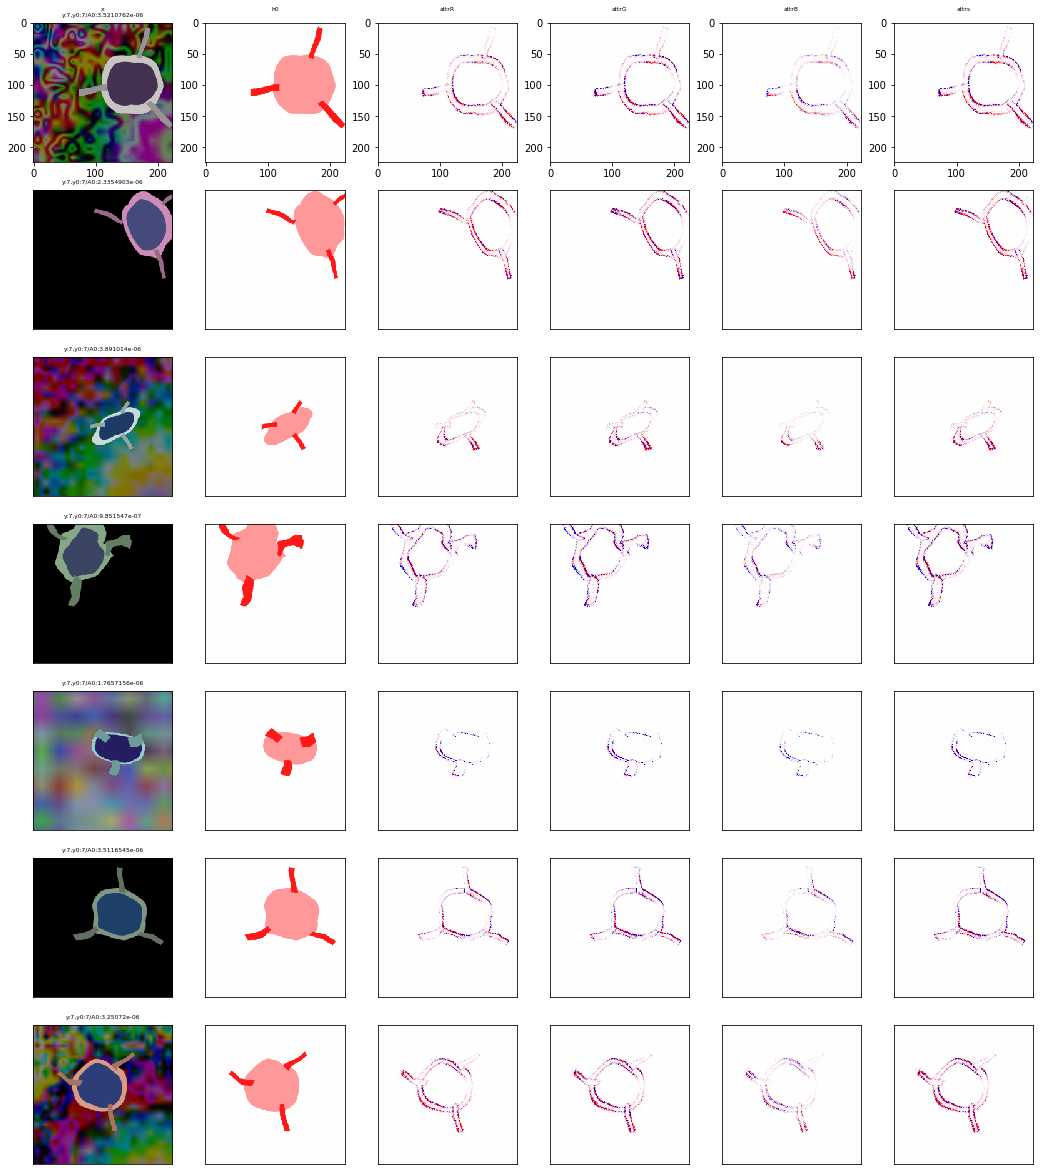

In [6]:
save_fig_by_gallery_label(gallery_label, gallery_items, None, CLAMP_VMIN=-0.1,CLAMP_VMAX=0.1)

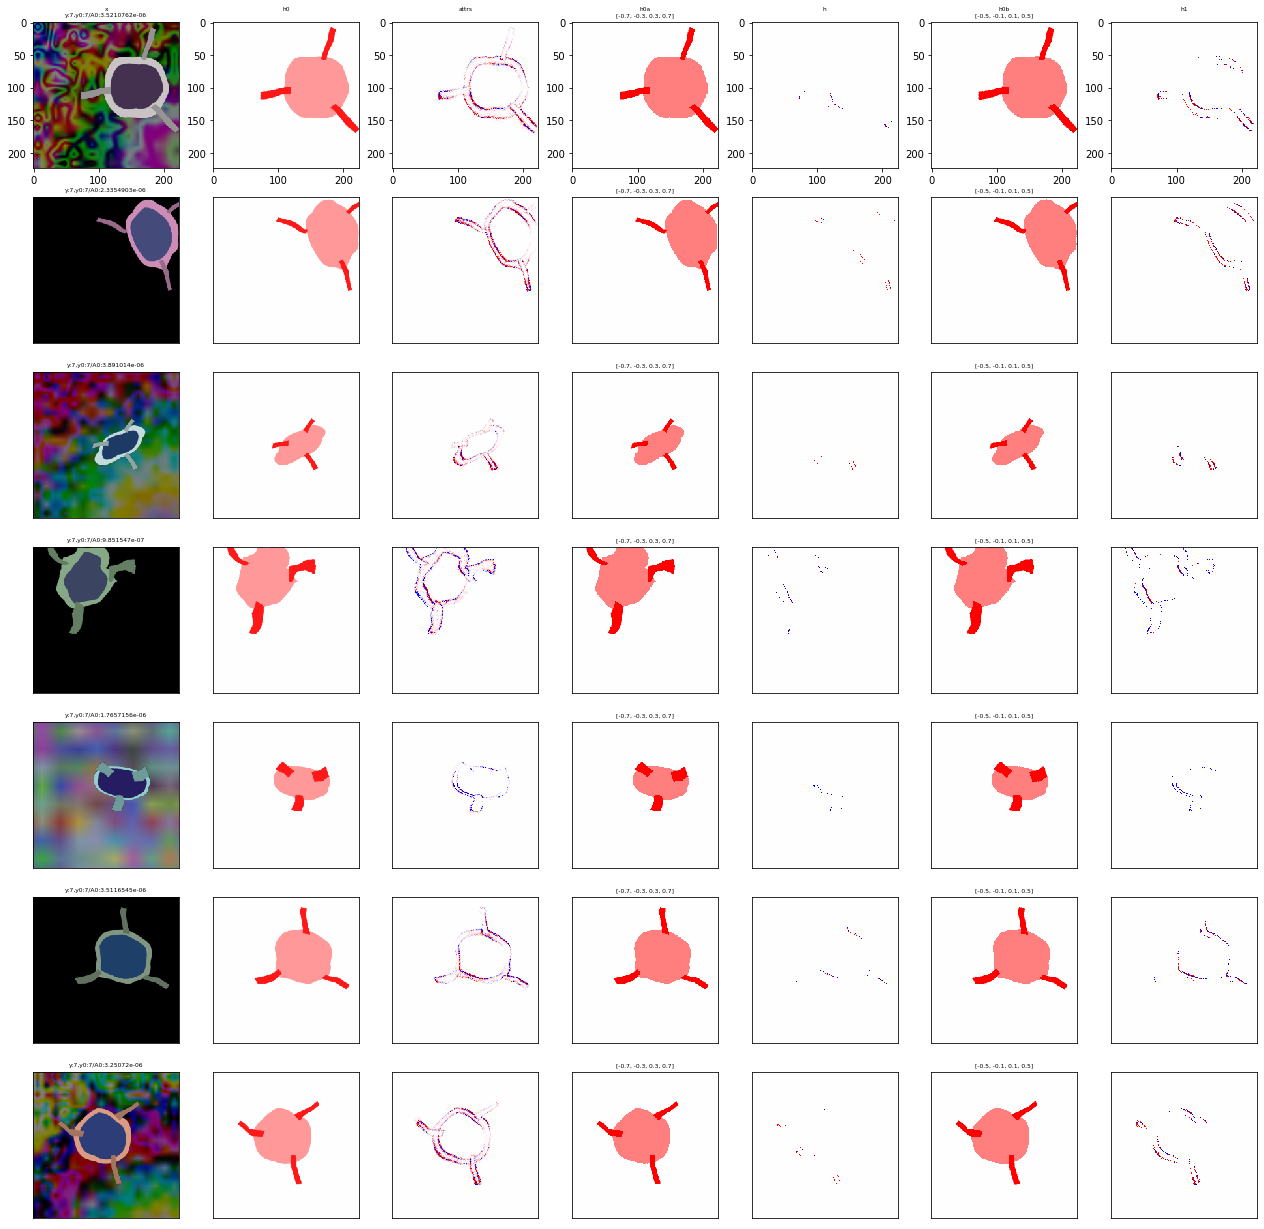

In [7]:
save_fig_by_gallery_label_banded_heatmaps(gallery_label, gallery_items, None)